In [53]:
import optuna
from optuna.importance import get_param_importances
import pickle
import torch
import os
import copy
os.chdir('/home/bjartur/workspace/python_focalh_clustering/') # Laptop and Desktop


import sys
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
from matplotlib.ticker import MultipleLocator
from scipy.optimize import linear_sum_assignment
from lib.misc_util import open_bundle


# Add the root folder to Python path
root_folder = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_folder not in sys.path:
    sys.path.append(root_folder)

import lib.unet_nn as UNet
import lib.modified_aggregation as MA
from lib.modified_aggregation_clusterer import ModifiedAggregationClusterer
from lib.unet_clusterer import UNetClusterer
from lib.focal import FocalH
from lib.base_nn import Data
from lib import metrics# import count_clusters, count_labels, compute_score, total, separation_efficiency



# Explore resolved and separation function

In [83]:
filename = "/home/bjartur/workspace/python_focalh_clustering/data/eval/EVAL_E350_P5_N100.root"
tfile = ROOT.TFile(filename, "READ")
ttree = tfile.Get("EventsTree")
event = 61
ttree.GetEntry(event)

ma_study = open_bundle("studies/best/ma/"+"study_ma_train_tiny_sep_100.pkl")
clus = ModifiedAggregationClusterer()
d = clus.cluster_debug(filename, ttree, event, ma_study["method"], ma_study["study"].best_params)


In [101]:
from importlib import reload
reload(metrics)

metrics.separation_efficiency([d["tags"]], [d["labels"]], [d["values"]], [d["energy"]])

(array([[4., 7.]]),
 [array([[ 43845.,  47473.],
         [ 75579.,  71000.],
         [112924., 115007.],
         [ 11154.,   7323.],
         [ 87402.,  61121.]])])

In [95]:
for i,e in enumerate(d["energy"]):
    mask = d["labels"] == i+1
    print(f"Energy: {e}, label: {i+1}, sum: {d["values"][mask].sum()}")

Energy: 350.0, label: 1, sum: 43845.0
Energy: 350.0, label: 2, sum: 75579.0
Energy: 350.0, label: 3, sum: 112924.0
Energy: 350.0, label: 4, sum: 11154.0
Energy: 350.0, label: 5, sum: 87402.0


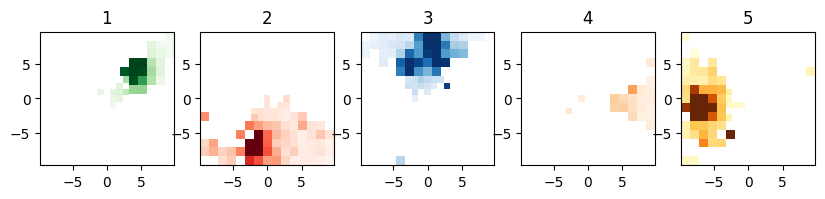

In [86]:


fig,ax = plt.subplots(ncols=5, figsize=(10,2))
foc = FocalH()
for i in range(5):
    mask = d["labels"] != i+1
    #ax[i].scatter(d["x"][mask], d["y"][mask], marker=".")
    vals = copy.deepcopy(d["values"])
    labels = copy.deepcopy(d["labels"])
#    vals[mask] = 0
    labels[mask] = 0
    foc.heatmap(vals, labels, ax[i])
    ax[i].set_title(f"{i+1}")
